## 2.1 Model analysis
**Exercise 1**:extension to continous time model system

Simpified ODE equations：
$$\begin{cases}dS/dt=(a-b)S -\gamma SN-p_1SI\\
dI/dt=p_2(N-S-I)-(b+\gamma N)I\\
dN/dt=aS-(b+\gamma N)N\end{cases}$$
transfer it to algorithm:
$$nextS=S+((a-b)*S-r*S*N-p1*S*I)*Dt$$
  $$ nextI=I+(p2*(N-S-I)-(b+r*N)*I)*Dt$$
   $$nextN=N+(a*S-(b+r*N)*N)*Dt$$
   $$nextt=t+Dt$$
1) find fixed points
$$(a-b)S-\gamma SN-p_1SI=0$$
$$p_2(N-S-I)-(b+\gamma N)I=0$$
$$aS-(b+\gamma N)N=0$$

Compose the equation set, we obtain the following:
$$ N_1=\frac{(a-b)}{\gamma}, N_0=\frac{p_2a+ab}{p_2p_1-a\gamma}$$
which means there are 2 equilibrium point.

If $$p_2p_1-a\gamma<0$$ $$K<=a(a-b)/p_2p_1=1.53$$
$N_0$ is unstable, and  $N_1$  is a stable and positive point which corresonding to the simulated result for $$N(t\to \infty)=(a-b)/\gamma$$
otherwise if $p_2p_1-a\gamma>0$ and $N_1>N_0$,
$N_0$is a stable point and vice versa.


**parameter definition

$a=0.45 $-new registered users growh rate  per month

$b=0.3$ - inactive users rate per month

$k=5 $ -environmental intake capacity of online social networks

$r=(a-b)/k$

$Dt=0.01 $

$p_1$  -the contact rate between the healthy node and transmission node

$p_2=0.55 $-probability that each immune node will become a transmission node

$S(t)$ - healthy nodes density (divides by 10000 users)

$I(t)$ - transimission nodes density

$R(t)$ -immune nodes density

In [5]:
import pylab 
import numpy 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
def continuous_simulation(k, p1, running_time = 350.):
    a=0.45
    b=0.3
    Dt=0.01
    p2=0.55
    r=(a-b)/k

    def initialize():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        S=2400/10000
        Sresult=[S]
        I=400/10000
        Iresult=[I]
        N=4039/10000
        Nresult=[N]
        t=0.
        timesteps=[t]

    def observe():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        Sresult.append(S)
        Iresult.append(I)
        Nresult.append(N)
        timesteps.append(t)

    def update():
        global S, I, N, Sresult, Iresult, Nresult, t, timesteps
        nextS=S+((a-b)*S-r*S*N-p1*S*I)*Dt
        nextI=I+(p2*(N-S-I)-(b+r*N)*I)*Dt
        nextN=N+(a*S-(b+r*N)*N)*Dt
        nextt=t+Dt
        S, I, N, t=nextS, nextI, nextN, nextt

    initialize()
    while t<running_time:
        update()
        observe()
    return (timesteps,Sresult,Iresult,Nresult)

In [7]:
def one_step_plot(timesteps,Sresult,Iresult,Nresult, plot_title):
    plt.plot(timesteps, Sresult, 'b--', label="health nodes")#blue dash
    plt.plot(timesteps, Iresult, 'g--', label="transmission nodes")#green dash
    plt.plot(timesteps, Nresult, 'r-', label="total nodes")#red solid
    plt.title(plot_title)
    plt.legend()

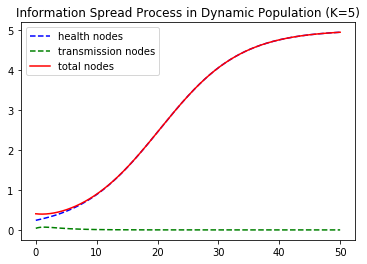

In [8]:
timesteps,Sresult,Iresult,Nresult = continuous_simulation(k=5, p1=0.08,running_time =50)
one_step_plot(timesteps,Sresult,Iresult,Nresult,plot_title = "Information Spread Process in Dynamic Population (K=5)")

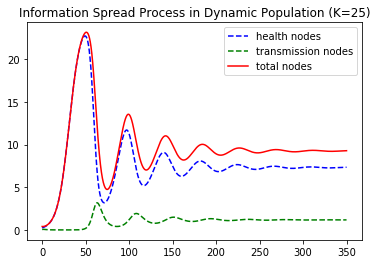

In [10]:
timesteps,Sresult,Iresult,Nresult = continuous_simulation(k=25, p1=0.08, running_time = 350)
one_step_plot(timesteps,Sresult,Iresult,Nresult,plot_title = "Information Spread Process in Dynamic Population (K=25)")

## 2.2 Model simulation
**Exercise 2** : compare the result of difference parameters

From one-step simulation,  when k is small, the information will not spread through the network successfuly since the infected nodes will recorvey to immune node or just dead to zero. With the increasing of the k value,  at the begining, information is unconfirmed; thus, a large amount of potentially information spreads rapidly in a short period through friendly relationships between people in social networks. then healthy and transmission nodes density will oscillate to a stable point which we discussed before.

#### 2.21 The influence of $p_1$ on the system
In this project, we are more interested in oscillation trend when the parameter k of environment capacity is larger. So we consider the different $p_1$ values for fixed k value of 15 to simulate different results of information spread trend. As shown in simulated gragh,  when $p_1$ is small, the healthy and infected nodes will increase to a stable point without oscillation. However with the increasing values of $p_1$, the information will spread to other users in the network more rapidly, and they need more time to attend a stable status which means the information will effect other users for a longer time with a higher transfer probability of each time step. 

#### 2.22 The influence of $k$ on the system
Also,  we set different $k$ value to simulate the information transfer process of fixed $p_1=0.08$. It is obvious that with the increasing  environmental capacity $k$, the total number of healthy and infected nodes will oscillate more dramatically and also need more time to attend a stable point since more active users will join to transfer the information.


In [11]:
def simulation(p1_list, k_test):
    iteration_result=dict()
    
    for p1_test in p1_list:
        res = continuous_simulation(k_test, p1_test)
        test = res[0]
        timesteps = res[1]
        iteration_result.update({p1_test:test})
    return (iteration_result,timesteps)

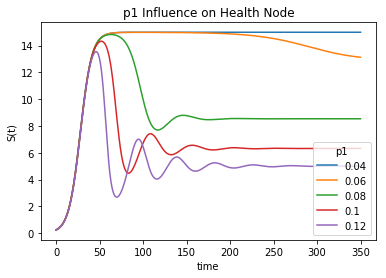

In [12]:
p1_list = [i*0.02 for i in range(2,7)] 
for p1_test in p1_list:
    res = continuous_simulation(15,p1_test)
    test = res[1]
    timesteps = res[0]
    plt.plot(timesteps, test,label=p1_test)
plt.legend(title='p1',loc = 4)
plt.xlabel ('time')
plt.ylabel ('S(t)')
plt.title("p1 Influence on Health Node")

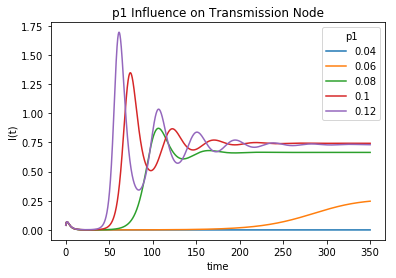

In [16]:
for p1_test in p1_list:
    res = continuous_simulation(15,p1_test)
    test = res[2]
    timesteps = res[0]
    plt.plot(timesteps, test,label=p1_test)
plt.legend(title='p1',loc = 'best')
plt.xlabel ('time')
plt.ylabel ('I(t)')
plt.title("p1 Influence on Transmission Node")

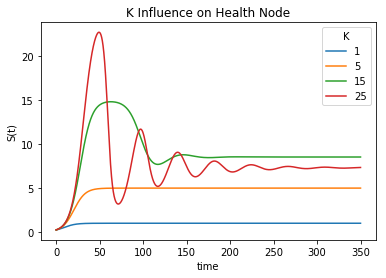

In [14]:
k_list = [1,5,15,25]
for k_test in k_list:
    res = continuous_simulation(k_test,0.08)
    test = res[1]
    timesteps = res[0]
    plt.plot(timesteps, test, label = k_test)
plt.legend(title='K',loc = "best")
plt.xlabel ('time')
plt.ylabel ('S(t)')
plt.title("K Influence on Health Node")

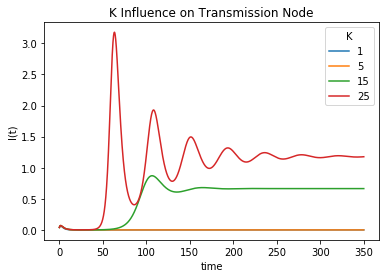

In [15]:
for k_test in k_list:
    res = continuous_simulation(k_test,0.08)
    test = res[2]
    timesteps = res[0]
    plt.plot(timesteps, test, label = k_test)
plt.legend(title='K',loc = "best")
plt.xlabel ('time')
plt.ylabel ('I(t)')
plt.title("K Influence on Transmission Node")